In [6]:
# %pip install pandas networkx matplotlib

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from time import sleep


In [2]:
dfd = pd.read_excel('metro_distancias_diretas.xlsx', sheet_name='metro_tempos_diretos', index_col=0)
dfr = pd.read_excel('metro_distancias_reais.xlsx', sheet_name='metro_tempos_reais', index_col=0)
linhas = pd.read_csv('conexoes_metro.csv', index_col=0)

### Matrizes de adjacências

In [3]:
dfd

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
E1,0.00,6.45,13.50,22.05,25.80,19.65,17.70,16.95,12.30,15.60,12.60,21.15,27.75,25.95
E2,6.45,0.00,7.95,15.45,19.65,19.05,15.45,10.35,6.45,11.10,8.85,16.95,22.20,19.35
E3,13.50,7.95,0.00,8.85,12.75,16.35,11.55,6.15,9.75,13.35,14.10,21.75,20.85,15.45
E4,22.05,15.45,8.85,0.00,4.35,22.50,19.05,6.00,13.65,14.55,18.30,22.05,15.90,9.00
E5,25.80,19.65,12.75,4.35,0.00,24.00,18.45,10.50,18.00,22.95,22.20,25.95,19.05,10.35
E6,19.65,19.05,16.35,22.50,24.00,0.00,4.80,22.65,24.75,27.75,28.50,36.45,37.80,31.65
E7,17.70,15.45,11.55,19.05,18.45,4.80,0.00,18.00,19.95,24.60,24.00,33.30,33.90,25.65
E8,16.95,10.35,6.15,6.00,10.50,22.65,18.00,0.00,7.50,8.40,11.85,18.60,14.70,9.60
E9,12.30,6.45,9.75,13.65,18.00,24.75,19.95,7.50,0.00,4.50,5.10,12.15,16.35,14.40
E10,15.60,11.10,13.35,14.55,22.95,27.75,24.60,8.40,4.50,0.00,5.10,8.40,11.55,12.60


In [4]:
dfr

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Column1,,,,,,,,,,,,,,
E1,0.00,6.45,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
E2,6.45,0.00,7.95,0.00,0.00,0.0,21.45,0.00,6.45,0.00,0.0,0.0,0.00,0.0
E3,0.00,7.95,0.00,8.85,0.00,0.0,12.75,6.15,0.00,0.00,0.0,0.0,0.00,0.0
E4,0.00,0.00,8.85,0.00,4.35,0.0,0.00,6.00,0.00,0.00,0.0,0.0,0.00,9.3
E5,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
E6,0.00,0.00,0.00,0.00,0.00,0.0,4.80,0.00,0.00,0.00,0.0,0.0,0.00,0.0
E7,0.00,21.45,12.75,0.00,0.00,4.8,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0
E8,0.00,0.00,6.15,6.00,0.00,0.0,0.00,0.00,7.50,9.00,0.0,0.0,0.00,0.0
E9,0.00,6.45,0.00,0.00,0.00,0.0,0.00,7.50,0.00,4.50,5.1,0.0,0.00,0.0


In [5]:
linhas

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
E1,-,vermelha,-,-,-,-,-,-,-,-,-,-,-,-
E2,vermelha,-,vermelha,-,-,-,verde,-,verde,-,-,-,-,-
E3,-,vermelha,-,vermelha,-,-,azul,azul,-,-,-,-,-,-
E4,-,-,vermelha,-,amarela,-,-,amarela,-,-,-,-,-,vermelha
E5,-,-,-,amarela,-,-,-,-,-,-,-,-,-,-
E6,-,-,-,-,-,-,azul,-,-,-,-,-,-,-
E7,-,verde,azul,-,-,azul,-,-,-,-,-,-,-,-
E8,-,-,azul,amarela,-,-,-,-,amarela,azul,-,-,-,-
E9,-,verde,-,-,-,-,-,amarela,-,verde,amarela,-,-,-
E10,-,-,-,-,-,-,-,azul,verde,-,-,azul,verde,-


### Grafos

In [7]:
GD = nx.from_pandas_adjacency(dfd) 
GR = nx.from_pandas_adjacency(dfr)

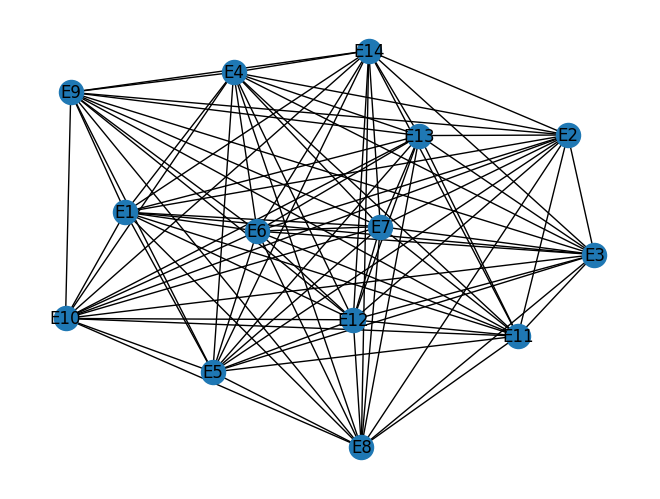

In [8]:
nx.draw(GD, with_labels=True)

In [9]:
list(GR.neighbors('E9'))

['E2', 'E8', 'E10', 'E11']

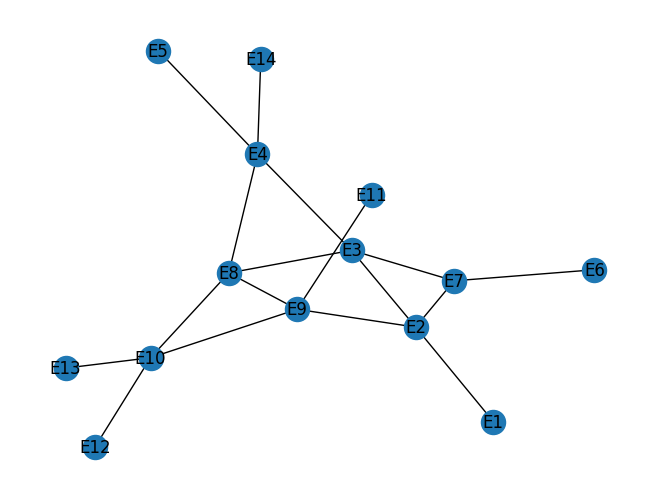

In [10]:
nx.draw(GR, with_labels=True)

### A*

In [20]:
# criar classe com o grafo para o problema de busca
class Mapa:
    def __init__(self, estacoes, distancias, conexoes, linhas):
        self.estacoes = estacoes
        self.distancias = distancias
        self.conexoes = conexoes
        self.linhas = linhas
        
    def t(self, inicio, fim):
        return self.distancias.get_edge_data(inicio, fim)['weight'] 

    def g(self, inicio, fim, memoria):
        if len(memoria) == 0:
            return self.distancias.get_edge_data(inicio, fim)['weight']        
        return self.distancias.get_edge_data(inicio, fim)['weight'] + memoria[-1][0]['custo_historico']
    
    def h(self, inicio, fim, baldeacao):
        if inicio == fim:
            return 0
        return self.distancias.get_edge_data(inicio, fim)['weight'] + baldeacao

    def f(self, h, g):
        return h + g
   
    def get_fronteira(self, estacao):
        return self.conexoes.neighbors(estacao)
    
    def a_star(self, origem, destino):

        self.origem = origem
        print(f"Origem: 🚩{origem}")
        self.destino = destino
        print(f"Destino: 🏁{destino}")
        print(f"-" * 50)

        self.estacao = self.origem
        self.memoria = []
                
        self.numero = 1
        while self.estacao != self.destino or self.numero == 3:
        # for i in range(3):
            print(f"Rodada: {self.numero}")
            print(f"Estação atual: 🏠{self.estacao}")

            # fronteira
            fronteira = self.get_fronteira(self.estacao)

            self.candidatos = self.get_fronteira(self.estacao)
            print(f"Candidatos: {list(self.candidatos)}")

            # # dados da iteração
            # rodada = {
            #     "numero": numero,
            #     "estacao": estacao,
            #     "fronteira": [],
            # }

            self.rodada = []
            for i in fronteira:

                
                if len(self.memoria) != 0:
                    print(self.memoria[-1][0]["linha"])
                    print(self.linhas.at[self.estacao, i])
                    self.baldeacao = self.memoria[-1][0]["linha"] != self.linhas.at[self.estacao, i]
                else:
                    self.baldeacao = False

                g = self.g(self.estacao, i, self.memoria)
                t = self.t(self.estacao, i)
                h = self.h(i, self.destino, self.baldeacao)
                f = self.f(h, g)


                candidato = {
                    "inicio": self.estacao,
                    "fim": i,
                    "linha": self.linhas.at[self.estacao, i],
                    "baldeacao": self.baldeacao,
                    "custo_historico": g,
                    "custo_trecho": t,
                    "custo_estimado": h,
                    "custo_total": f
                }
                
                self.rodada.append(candidato)
                print(f"Candidato {i}: {candidato}")
            
            # ordena fronteira
            self.rodada.sort(key=lambda x: x["custo_total"])

            # salva na memoria 
            self.memoria.append(self.rodada)
                
            resultado = {i+1: r['fim'] for i, r in enumerate(self.rodada)}
            print(f"Resultado: {resultado}")
            self.numero += 1

            # seleciona o melhor destino
            self.estacao = self.rodada[0]["fim"]
            print(f"Próxima estação: {self.estacao}")
            
            print(f"*" * 50)
            print(f" " )
            sleep(2)


        trajeto = [(r[0])  for r in self.memoria]
        
        print(f"Trajeto:")
        for i, p in enumerate(trajeto):
            print(f"{i+1}: {p}")
        
        print(f"Custo total estimado: {self.memoria[-1][0]['custo_total']}")

        return self.memoria


In [21]:
metro = Mapa(GD.nodes, GD, GR, linhas)
arvore = metro.a_star('E2', 'E4')

Origem: 🚩E2
Destino: 🏁E4
--------------------------------------------------
Rodada: 1
Estação atual: 🏠E2
Candidatos: ['E1', 'E3', 'E7', 'E9']
Candidato E1: {'inicio': 'E2', 'fim': 'E1', 'linha': 'vermelha', 'baldeacao': False, 'custo_historico': 6.45, 'custo_trecho': 6.45, 'custo_estimado': 22.05, 'custo_total': 28.5}
Candidato E3: {'inicio': 'E2', 'fim': 'E3', 'linha': 'vermelha', 'baldeacao': False, 'custo_historico': 7.95, 'custo_trecho': 7.95, 'custo_estimado': 8.850000000000001, 'custo_total': 16.8}
Candidato E7: {'inicio': 'E2', 'fim': 'E7', 'linha': 'verde', 'baldeacao': False, 'custo_historico': 15.450000000000001, 'custo_trecho': 15.450000000000001, 'custo_estimado': 19.05, 'custo_total': 34.5}
Candidato E9: {'inicio': 'E2', 'fim': 'E9', 'linha': 'verde', 'baldeacao': False, 'custo_historico': 6.45, 'custo_trecho': 6.45, 'custo_estimado': 13.649999999999999, 'custo_total': 20.099999999999998}
Resultado: {1: 'E3', 2: 'E9', 3: 'E1', 4: 'E7'}
Próxima estação: E3
*****************

In [33]:
memoria = {}

In [34]:
memoria['e2'] = {}

In [35]:
memoria['e2']['e1'] = {}
memoria['e2']['e3'] = {}
memoria['e2']['e7'] = {}
memoria['e2']['e9'] = {}


In [36]:
memoria['e2']['e9']['e10'] = {}
memoria['e2']['e9']['e11'] = {}
memoria['e2']['e9']['e12'] = {}
memoria['e2']['e9']['e13'] = {}


In [37]:
memoria['e2']['e9']['e10']['e9'] = {}

In [38]:
memoria

{'e2': {'e1': {},
  'e3': {},
  'e7': {},
  'e9': {'e10': {'e9': {}}, 'e11': {}, 'e12': {}, 'e13': {}}}}